# ANALISIS E INSIGHTS

## SET UP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlalchemy as sa
import seaborn as sns
%config IPCompleter.greedy=True
pd.options.display.max_columns = None

## CARGA DE DATOS

In [2]:
con = sa.create_engine('sqlite:///../Datos/airbnb.db')
df = pd.read_sql('df_preparado', con = con)

In [3]:
df.head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion_%,bedrooms_discretizada,accommodates_disc,beds_disc,reviews_disc,metros_2,precio_compra,pdi_sol
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,2,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín,60.0,50,01_Una,0-3,1,49-743,50,178430.0,5.032039
1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina,31.0,0,01_Una,0-3,1,5-48,50,79345.0,3.521406
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,5,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela,50.0,39,03_Tres,5-16,3-23,1-4,90,257355.0,3.226963
3,3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro,92.0,68,01_Una,0-3,1,5-48,50,168945.0,0.591065
4,4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela,26.0,4,01_Una,0-3,1,49-743,50,142975.0,3.200942


## ANALISIS

### Analisis sobre el precio

**¿Cual es el precio medio? ¿y el rango de precios?¿Y por distritos?¿Y por barrios?**

**¿Cual es el ranking de distritos y barrios por precio medio de alquiler?**

In [4]:
df.precio_total.describe()

count    17710.000000
mean       141.794850
std        475.834411
min         20.000000
25%         41.000000
50%         69.000000
75%        110.000000
max      14000.000000
Name: precio_total, dtype: float64

Se ve que hay al menos un atípico por la parte de arriba que sesga la media, por tanto vamos a usar la mediana como medida de centralización más fiable.

In [5]:
#ahora se analiza el precio total agrupado por distrito, utilizando el framework suizo
df.groupby('distrito').precio_total.median().sort_values(ascending=False)

distrito
Salamanca                87.0
San Blas - Canillejas    86.0
Centro                   75.0
Chamartín                70.0
Chamberí                 70.0
Hortaleza                67.5
Retiro                   66.0
Tetuán                   65.0
Moncloa - Aravaca        60.0
Fuencarral - El Pardo    59.0
Arganzuela               57.0
Ciudad Lineal            49.0
Vicálvaro                47.6
Villa de Vallecas        46.1
Barajas                  46.0
Latina                   46.0
Carabanchel              46.0
Usera                    40.6
Moratalaz                40.0
Puente de Vallecas       40.0
Villaverde               39.0
Name: precio_total, dtype: float64

Llama la atención el dato de San Blas, vamos a verlo con más detalle a ver qué está pasando.

Se encontro en los nombres de las publicaciones que todas estan dirigidas a la final de la champions league. Lo que abre un nuevo modelo de negocios para explorar. Los eventos deportivos.

In [6]:
df.loc[df.distrito == 'San Blas - Canillejas'].sort_values('precio_total',ascending = False).head(10)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion_%,bedrooms_discretizada,accommodates_disc,beds_disc,reviews_disc,metros_2,precio_compra,pdi_sol
10189,10189,10189,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,143732655,San Blas - Canillejas,Canillejas,40.44937,-3.61633,Entire home/apt,6000,1,1,365,We are talking about one of the last villas fo...,f,6,4.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6000.0,0,04_Cuatro_o_mas,5-16,3-23,1-4,120,217644.0,8.212429
9290,9290,9290,34600594,3 rooms near Wanda,38951538,San Blas - Canillejas,Arcos,40.42105,-3.61457,Private room,2800,1,2,0,3 rooms 15´walking from Wanda.,f,6,3.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,5880.0,100,03_Tres,5-16,3-23,1-4,90,163233.0,7.532233
9662,9662,9662,34826962,Pozos rooms,222068421,San Blas - Canillejas,Arcos,40.41927,-3.61555,Private room,3000,1,1,88,Cerca nos podemos encontrar un centro comercia...,f,4,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,75,02_Dos,4,2,1-4,70,126959.0,7.439364
9831,9831,9831,34933116,FINAL CHAMPIONS LEAGUE MADRID,263232278,San Blas - Canillejas,Simancas,40.43968,-3.61933,Private room,2000,2,1,365,Near (15 minutes walking) to WANDA STADIUM.<br...,f,5,3.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,03_Tres,5-16,2,1-4,90,163233.0,7.557076
9668,9668,9668,34833756,Wanda Champions Final,29628177,San Blas - Canillejas,Rosas,40.42622,-3.60502,Private room,2700,1,1,0,Somos una pareja joven educados y muy sociable...,f,5,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,3780.0,100,02_Dos,5-16,2,1-4,70,126959.0,8.391922
9677,9677,9677,34836238,"ALQUILER ÁTICO, CHAMPIONS, A 10min DEL WANDA.",262622230,San Blas - Canillejas,Simancas,40.43879,-3.61425,Entire home/apt,3000,1,1,363,"CHAMPION, Ático a 10 min del Wanda, metro Torr...",f,4,2.0,1.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,3000.0,0,02_Dos,4,1,1-4,70,126959.0,7.932095
10404,10404,10404,35251141,Se alquila para final de la champion league,265376740,San Blas - Canillejas,Canillejas,40.44292,-3.60764,Entire home/apt,3000,1,1,365,None,f,1,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,3000.0,0,02_Dos,0-3,3-23,1-4,70,126959.0,8.610212
9878,9878,9878,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,263474389,San Blas - Canillejas,Arcos,40.41920,-3.61229,Private room,800,1,1,88,"Se alquilan 5 habitaciones, cada una para 2 hu...",f,10,5.0,8.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,2800.0,75,04_Cuatro_o_mas,5-16,3-23,1-4,150,272055.0,7.714952
9223,9223,9223,34566381,Alquiler piso para final de la Champions league,260821774,San Blas - Canillejas,Simancas,40.43502,-3.62565,Entire home/apt,2600,2,1,0,Piso muy acogedor e iluminado con 2 habitacion...,f,4,2.0,1.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,2600.0,100,02_Dos,4,1,1-4,70,126959.0,6.885409
9252,9252,9252,34588914,Habitacion matriminio juveniles final champions,8965847,San Blas - Canillejas,Rejas,40.44853,-3.60137,Private room,1700,1,2,179,None,f,4,2.0,1.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,2380.0,50,02_Dos,4,1,1-4,70,126959.0,9.329452


Vemos que son precios en el entorno de los 3.000 - 5.000 euros!

Al leer la descripción nos damos cuenta de todos estos precios están definidos por la final de la Champions League.

Lo cual es un insight interesante:

Insight 1: pueden existir inmuebles con un valor regular residual pero con alto valor en momentos puntuales por acontenicimientos deportivos o espectáculos

En el resto no hay sorpresas, con distritos como Salamanca, Centro o Chanmartín a la cabeza.

Pero por ejemplo vemos que la diferencia de precio media entre Retiro y Tetuán es muy baja.

Esto nos lleva a comparar el precio medio por distrito con el precio medio de compra también por distrito.

In [7]:
temp = df.groupby('distrito')[['precio_total','precio_compra']].median().sort_values('precio_total', ascending = False)
temp

,precio_total,precio_compra
distrito,,
Salamanca,87.0,213990.0
San Blas - Canillejas,86.0,90685.0
Centro,75.0,168945.0
Chamartín,70.0,178430.0
Chamberí,70.0,188335.0
Hortaleza,67.5,135485.0
Retiro,66.0,167580.0
Tetuán,65.0,128730.0
Moncloa - Aravaca,60.0,141155.0


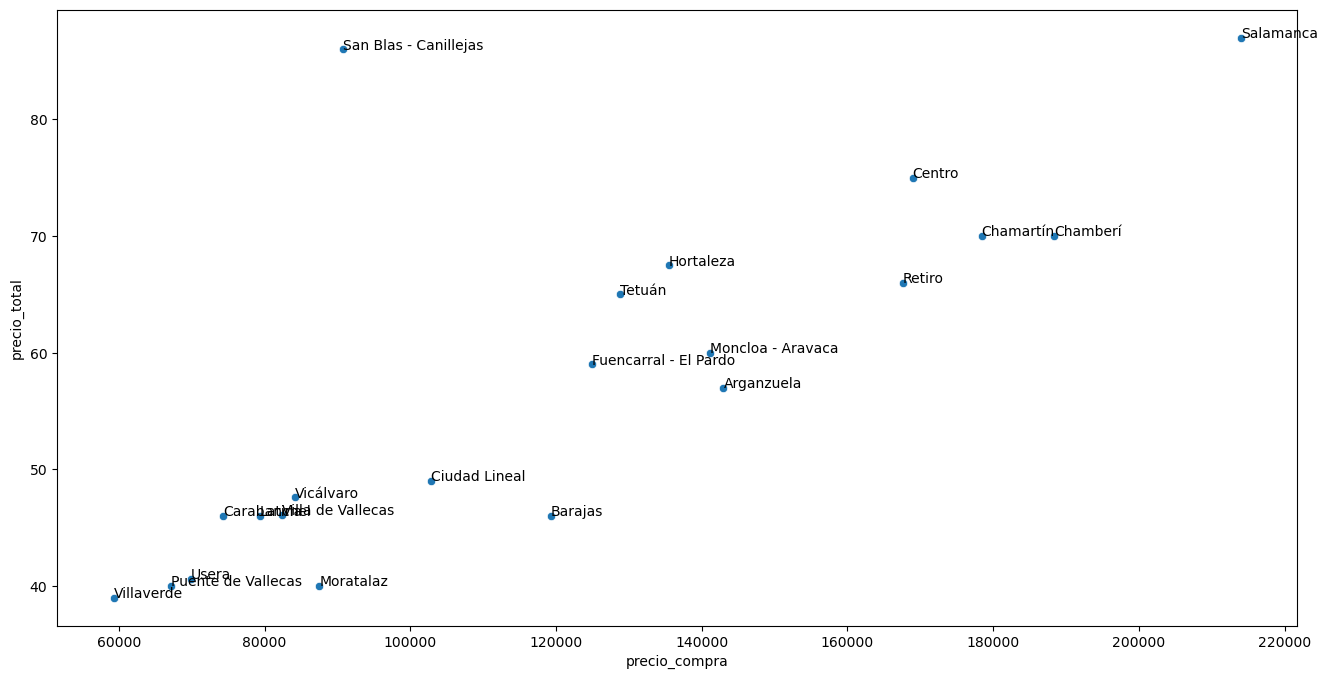

In [8]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')

#con el for lo que recorre son todos los puntos desde 0 hasta el total de registros (que son los distritos)
for cada in range(0, temp.shape[0]):
    #y ahora aplica el texto, lo primero que se pasa son las coordenadas, en este caso precio_compra y precio_total. Y al final la eqiqueta que sale
    #del index, es decir el nombre del distrito.
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada]);

#se puede ver como hay una relacion lineal entre el precio de compra y el precio de alquiler (excepto san blas)

Existe una clara correlación entre el precio de compra en cada distrito y el precio que podremos cobrar.

Claramente se perciben tres clusters de bajo-bajo, medio-medio y alto-alto.

Y la excepción de San Blas que ya sabemos por qué es.

Vamos a repetir el análisis a nivel de barrio a ver si identificamos algo.

In [9]:
temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median().sort_values('precio_total', ascending = False)
temp

,precio_total,precio_compra
neighbourhood,,
Rosas,300.0,90685.0
Arcos,250.0,90685.0
Canillejas,210.0,90685.0
Hellín,174.5,90685.0
Recoletos,110.0,213990.0
...,...,...
Pavones,32.0,87500.0
Orcasur,30.0,69825.0
Zofío,28.0,69825.0


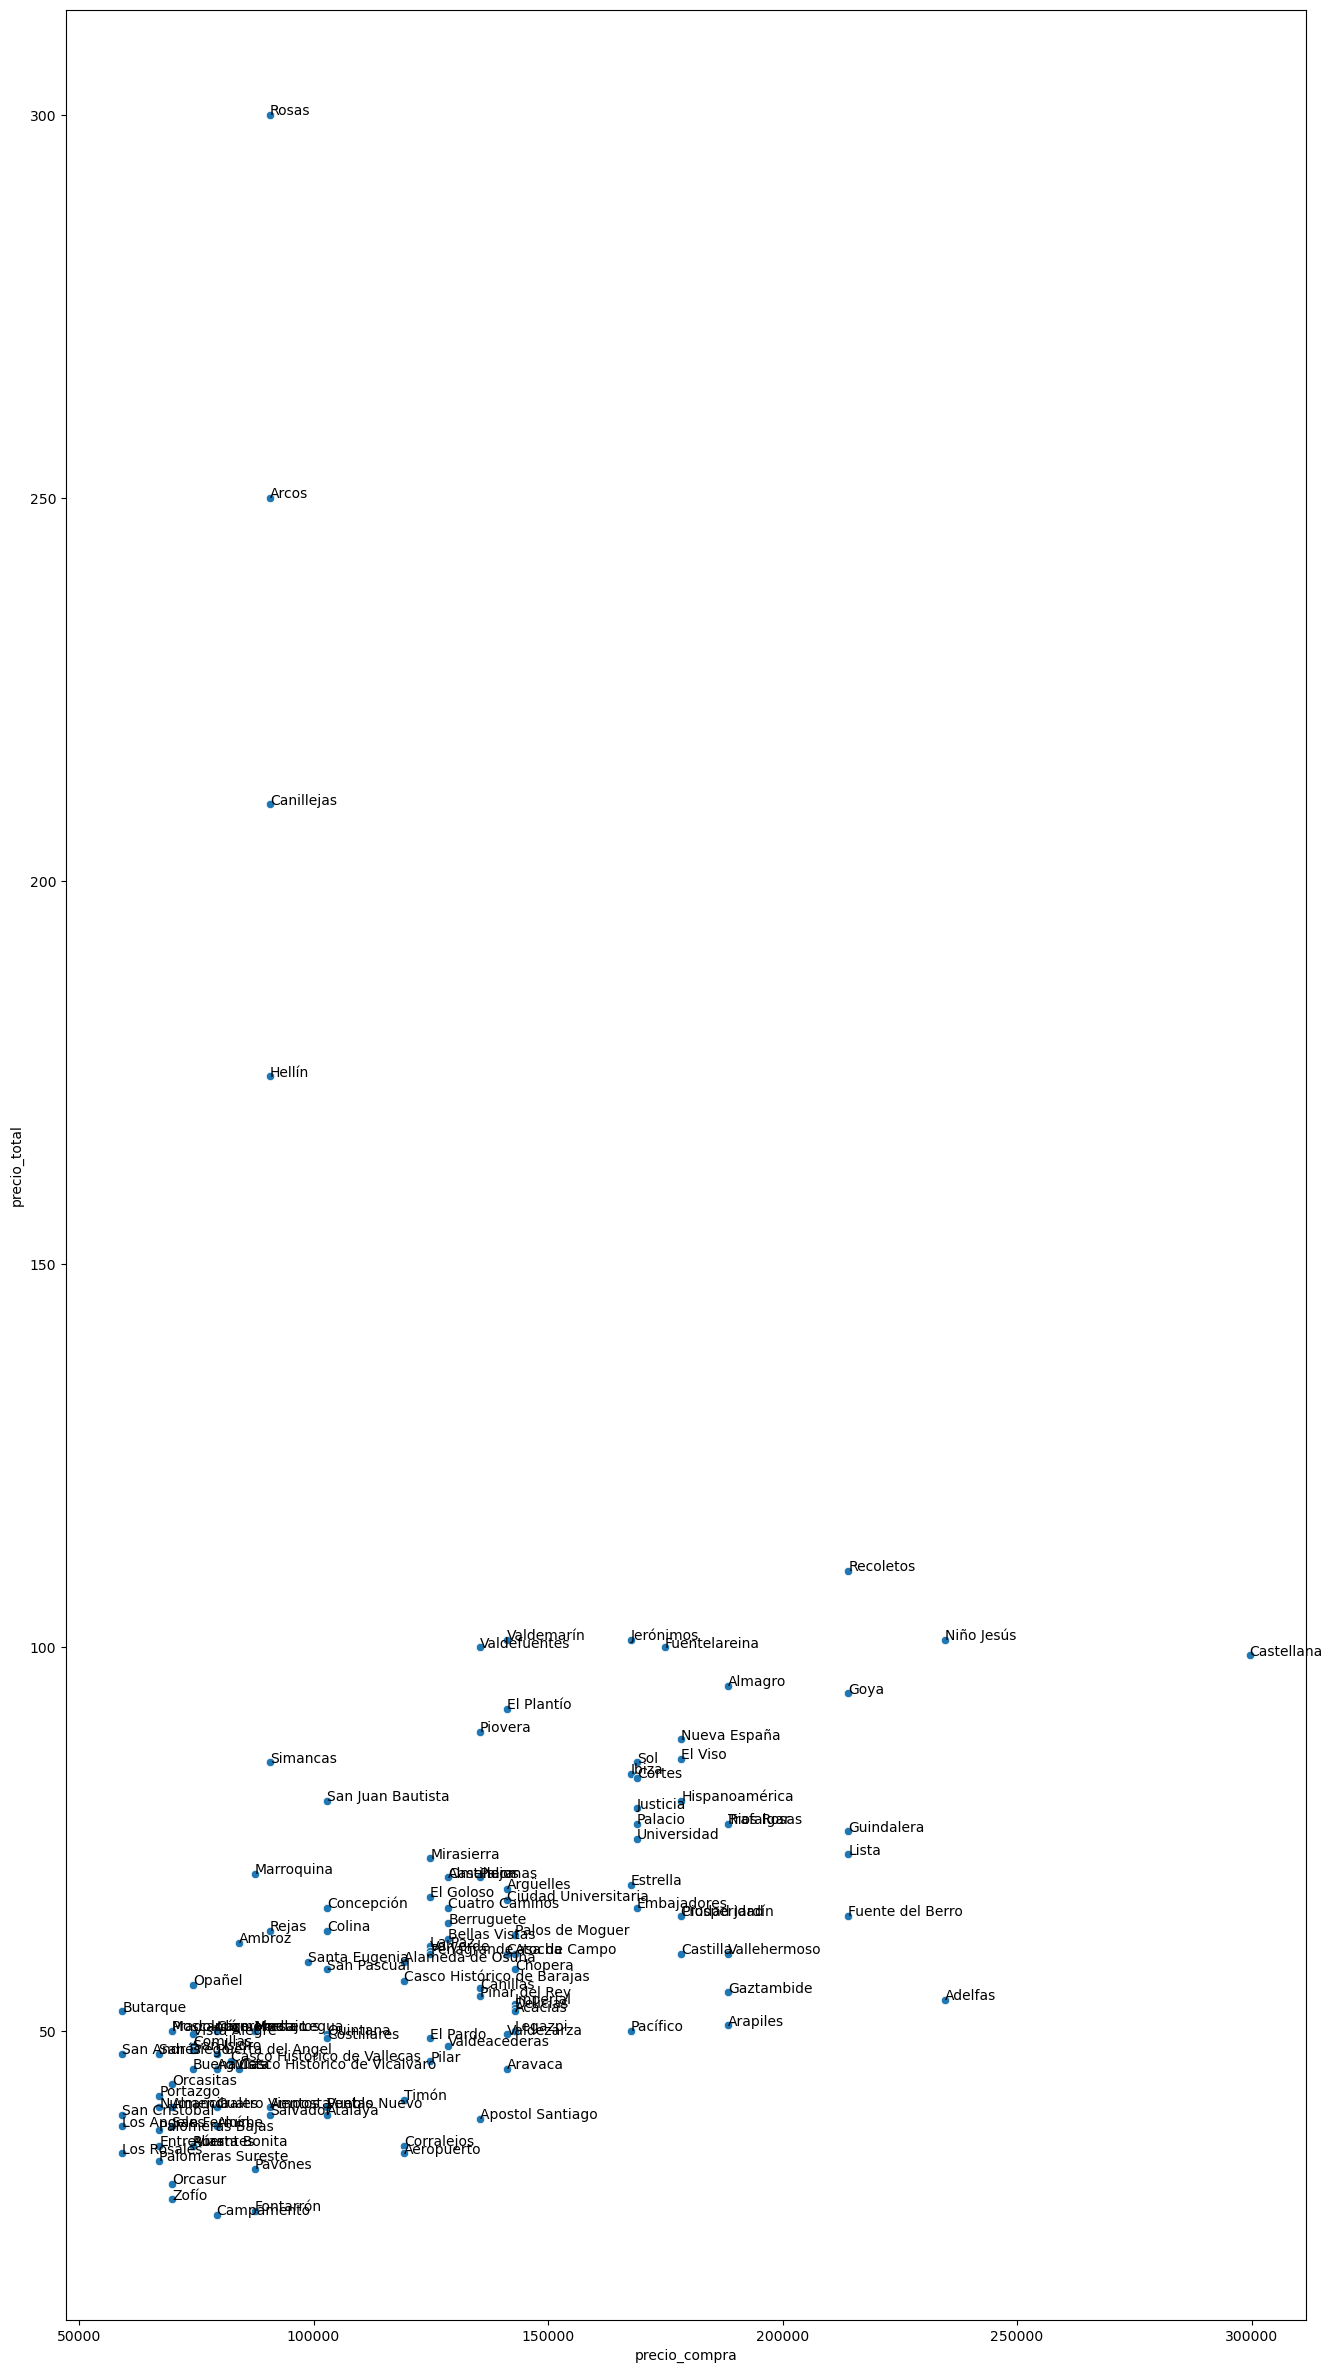

In [10]:
plt.figure(figsize = (16,30))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')

for cada in range(0, temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada]);

#se vuelve a ver lo mismo. Que dento de cada segmento (3 grupos que se arman) hay barrios mas convenientes. como es el caso de Plantío, o Rosas en san blas

A este nivel ya se ven más cosas:

* 3 barrios que sobresalen, posiblemente los 3 sean de San Blas
* Dentro de cada grupo de bajo-medio-alto sí podemos empezar a separarar
    * Bajo: Simancas, Ambroz, Marroquina, San Juan Bautista
    * Medio: El Plantio, Valdemarín, Valdefuentes
    * Medio-alto: Jerónimos, Fuentela reina
    * Alto: Recoletos
    
**Insight 2: Existen ciertos barrios que apriori pueden maximizar la relación coste-ingresos y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interes invertir**

**¿Qué factores (a parte de la localización determinan el precio del alquiler?**

Para responder a esta pregunta podemos construir un minicubo, ya que hemos discretizado nuestras variables de análisis.

In [11]:
#se hace un filter para traer las variables que contengan disc y traer asi la discretizadas. Para poder construir un minicubo
df.filter(like = 'disc')

,bedrooms_discretizada,accommodates_disc,beds_disc,reviews_disc
0,01_Una,0-3,1,49-743
1,01_Una,0-3,1,5-48
2,03_Tres,5-16,3-23,1-4
3,01_Una,0-3,1,5-48
4,01_Una,0-3,1,49-743
...,...,...,...,...
17705,01_Una,0-3,1,1-4
17706,01_Una,0-3,1,1-4
17707,01_Una,0-3,1,1-4
17708,01_Una,0-3,1,1-4


In [12]:
#ahora se pasa a crear un minicubo para profundizar el analisis.
metricas = ['precio_compra', 'precio_total']

dimensiones = ['bedrooms_discretizada', 'accommodates_disc', 'beds_disc']

minicubo_precio = df[dimensiones + metricas]

minicubo_precio

,bedrooms_discretizada,accommodates_disc,beds_disc,precio_compra,precio_total
0,01_Una,0-3,1,178430.0,60.0
1,01_Una,0-3,1,79345.0,31.0
2,03_Tres,5-16,3-23,257355.0,50.0
3,01_Una,0-3,1,168945.0,92.0
4,01_Una,0-3,1,142975.0,26.0
...,...,...,...,...,...
17705,01_Una,0-3,1,168945.0,29.0
17706,01_Una,0-3,1,168945.0,29.0
17707,01_Una,0-3,1,168945.0,29.0
17708,01_Una,0-3,1,213990.0,29.0


In [13]:
#paso 2 con melt se pasa de formate tabular a transaccional. 
minicubo_precio = minicubo_precio.melt(id_vars = ['precio_compra', 'precio_total'])
minicubo_precio

,precio_compra,precio_total,variable,value
0,178430.0,60.0,bedrooms_discretizada,01_Una
1,79345.0,31.0,bedrooms_discretizada,01_Una
2,257355.0,50.0,bedrooms_discretizada,03_Tres
3,168945.0,92.0,bedrooms_discretizada,01_Una
4,142975.0,26.0,bedrooms_discretizada,01_Una
...,...,...,...,...
53125,168945.0,29.0,beds_disc,1
53126,168945.0,29.0,beds_disc,1
53127,168945.0,29.0,beds_disc,1
53128,213990.0,29.0,beds_disc,1


In [14]:
#paso 3 se agregan las metricas de analisis.
minicubo_precio = minicubo_precio.groupby(['variable', 'value'])[['precio_compra', 'precio_total']].agg('median')
minicubo_precio
#aqui ya tengo el minicubo terminado. Esto se inetrpreta en el caso de bedrooms por ejemplo como que.
#los departamentos que tengan una habitacion tienen un precio de compra medio (por usar la mediana) de 168945 y un precio total medio de de 55

precio_compra  precio_total
variable              value                                       
accommodates_disc     0-3                   168945.0          50.0
                      4                     168945.0          85.0
                      5-16                  236523.0         126.0
bedrooms_discretizada 01_Una                168945.0          55.0
                      02_Dos                236523.0         100.0
                      03_Tres               304101.0         140.0
                      04_Cuatro_o_mas       405468.0         207.0
beds_disc             1                     168945.0          58.0
                      2                     236523.0         100.0
                      3-23                  257355.0         134.0

Sobre el minicubo se va analizando cada variable.

In [15]:
minicubo_precio.loc['bedrooms_discretizada']

,precio_compra,precio_total
value,,
01_Una,168945.0,55.0
02_Dos,236523.0,100.0
03_Tres,304101.0,140.0
04_Cuatro_o_mas,405468.0,207.0


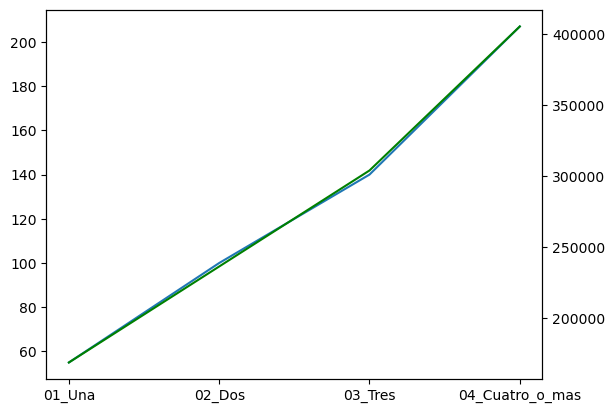

In [16]:
#para graficar esto podemos hacer un grafico gemelo. donde tengamos el eje x compratido y el eje y de dos variables.
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_discretizada'].precio_total)
#hasta arriba tengo el eje x y un eje y. Ahora especifico que es un grafico con ax gemelo y luego creo el eje y
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_discretizada'].precio_compra, color = 'green');

#vemos que las lineas casi que se superponen y esto es porque hay una relacion directa entre el precio de compra y el precio
#de alquiler. Pero tengamos en cuenta que esto no se da de forma organica ya que para estimar el precio total de compra use
#el numero de habitaciones por los metros cuadrados.

En cuanto al número de habitaciones no hay nada que destacar.

Existe una relación casi perfecta entre el precio de compra y el precio total que se puede cobrar.

Parte de este efecto puede ser artificial, ya que usamos el número de habitaciones para calcular el precio total como el precio de compra.

In [17]:
#ahora hago el mismo analisis pero sobre la variable beds_disc
minicubo_precio.loc['beds_disc']

,precio_compra,precio_total
value,,
1,168945.0,58.0
2,236523.0,100.0
3-23,257355.0,134.0


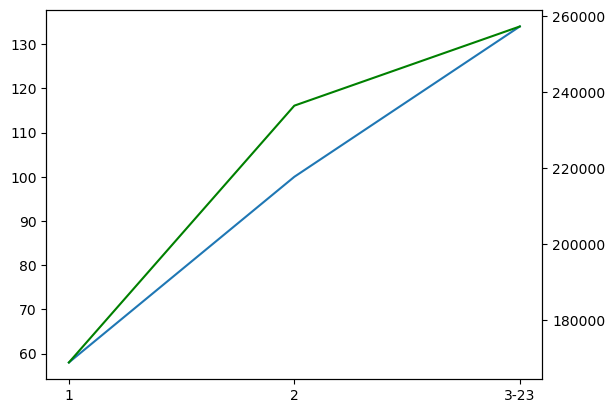

In [18]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)

ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra, color = 'green');
#

En cuanto al número de camas sí hay una conclusión:

**Insight 3: el número de camas a evitar es 2**. O bien ponemos una cama o intentamos meter todas las posibles.

Dado que no había este efecto en el número de habitaciones ¿podría ser que los propietarios estén intentando meter muchas más camas que habitaciones para maximizar el ingreso?

Veámoslo por ejemplo con los pisos de una habitación:

#### Analisis de la variable de cercania al punto de interes

In [19]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()
seleccion

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

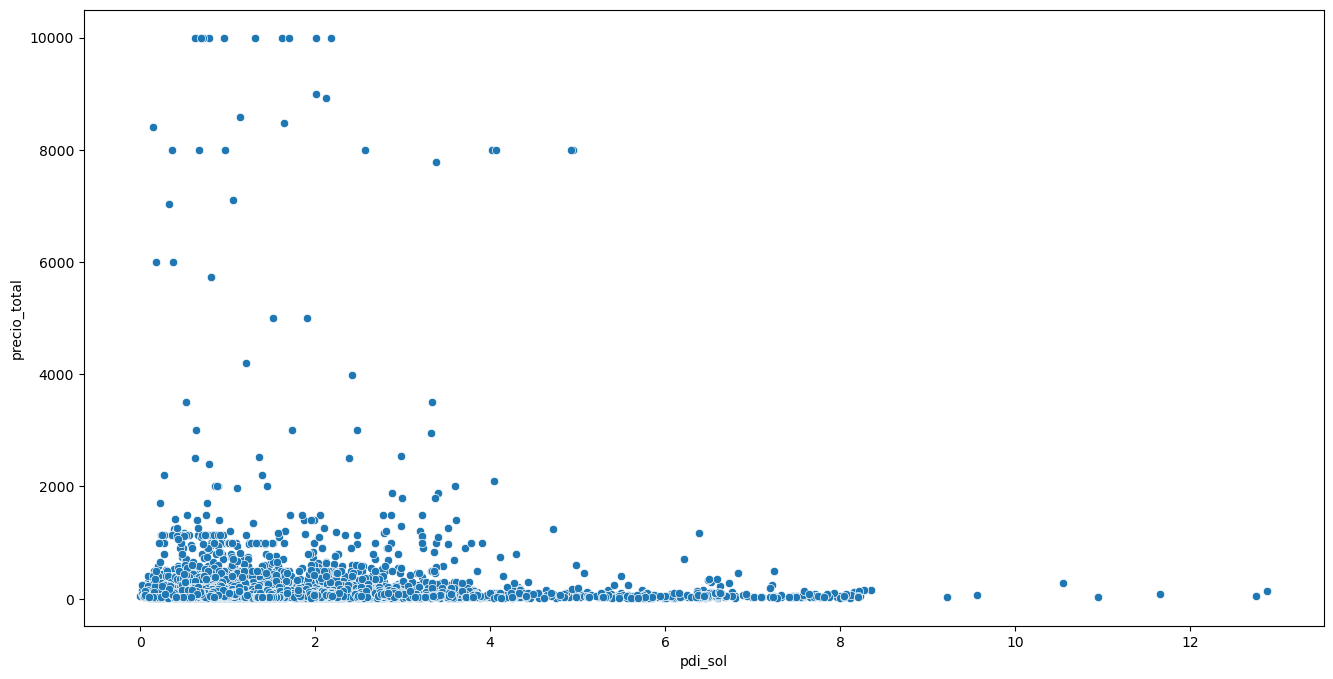

In [20]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

No parece haber una relación tan directa como sería esperable entre la distancia a la Puerta del Sol y el precio de alquiler.

**Insight 5: estando dentro del distrito parece que la cercanía a puntos de interés no tiene tanto impacto como sería esperable. Eso abre la puerta a buscar inmuebles que estando en un distrito céntrico no estén justo al lado del PdI y por tanto esperablmente tengan un precio de compra menor**

In [21]:
df.iloc[df.loc[df.distrito.isin(seleccion)].pdi_sol.nlargest(10).index]

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion_%,bedrooms_discretizada,accommodates_disc,beds_disc,reviews_disc,metros_2,precio_compra,pdi_sol
2271,2271,2271,11621570,Cheerful and family house in Madrid,60182861,Moncloa - Aravaca,El Plantío,40.47316,-3.83625,Entire home/apt,131,2,1,230,House in Madrid at fifteen min. from the cente...,f,9,5.0,7.0,105,4.72,4.89,4.58,4033,Moncloa - Aravaca,131.0,36,04_Cuatro_o_mas,5-16,3-23,49-743,150,423465.0,12.882968
7692,7692,7692,29373862,Apartamento tipo estudio amplio,67953649,Moncloa - Aravaca,El Plantío,40.47554,-3.83263,Entire home/apt,41,2,1,0,El apartamento tipo estudio esta completamente...,f,2,1.0,0.0,7,3.86,4.29,4.14,4033,Moncloa - Aravaca,41.0,100,01_Una,0-3,1,5-48,50,141155.0,12.749862
13079,13079,13079,41978391,Habitación preciosa y luminosa en Madrid,83059410,Moncloa - Aravaca,El Plantío,40.47001,-3.82194,Private room,92,1,1,90,"Habitación muy luminosa, con dos camas individ...",f,2,1.0,2.0,1,3.00,3.00,3.00,4033,Moncloa - Aravaca,92.0,75,01_Una,0-3,1,1-4,50,141155.0,11.658133
10831,10831,10831,36416390,Cool LOFT en zona residencial,7841643,Moncloa - Aravaca,El Plantío,40.46705,-3.81442,Private room,39,6,1,135,Bonita buhardilla privada de 40m2 en Zona resi...,f,2,1.0,1.0,3,4.33,5.00,4.67,4033,Moncloa - Aravaca,39.0,63,01_Una,0-3,1,1-4,50,141155.0,10.942849
12069,12069,12069,39982406,LUXURY 5 BEDROOM APARTMENT IN MONCLOA-ARAVACA,308267305,Moncloa - Aravaca,El Plantío,40.46653,-3.80941,Entire home/apt,274,4,1,365,Apartamento Independiente de Lujo en 1ª Planta...,f,10,5.0,8.0,1,5.00,5.00,5.00,4033,Moncloa - Aravaca,274.0,0,04_Cuatro_o_mas,5-16,3-23,1-4,150,423465.0,10.550197
1254,1254,1254,6200039,BEAUTIFUL APARTMENT IN MADRID,3147269,Moncloa - Aravaca,Valdemarín,40.46611,-3.79578,Entire home/apt,70,3,1,0,"Clean, modern, luxury 1 bedroom apartment, loc...",f,3,1.0,1.0,0,NaN,NaN,NaN,4033,Moncloa - Aravaca,70.0,100,01_Una,0-3,1,1-4,50,141155.0,9.560499
13005,13005,13005,41874132,"Acogedora vivienda, con jardín y paddle",41978004,Moncloa - Aravaca,Valdemarín,40.46590,-3.79099,Private room,29,2,1,0,A strategic location in the priviledge area of...,f,2,1.0,1.0,6,4.80,5.00,5.00,4033,Moncloa - Aravaca,29.0,100,01_Una,0-3,1,5-48,50,141155.0,9.217687
7539,7539,7539,28832793,Spacious Apartment for 6-8 MONCLOA-ARAVACA 180m2,213310088,Moncloa - Aravaca,Aravaca,40.45967,-3.78436,Entire home/apt,151,3,1,139,This modern and bright penthouse (180m2) is i...,f,6,4.0,5.0,36,4.33,4.64,4.75,4033,Moncloa - Aravaca,151.0,61,04_Cuatro_o_mas,5-16,3-23,5-48,120,338772.0,8.358053
8526,8526,8526,32337290,Bonito y acogedor apartamento en Madrid,9512870,Moncloa - Aravaca,Aravaca,40.46082,-3.78209,Entire home/apt,150,6,1,321,<b>Guest access</b><br />zona común y piscina,f,6,2.0,4.0,1,3.00,1.00,3.00,4033,Moncloa - Aravaca,150.0,12,02_Dos,5-16,3-23,1-4,70,197617.0,8.276192
1279,1279,1279,6322780,"Habitacion privada con 2 camas, armario empotr...",32901590,Moncloa - Aravaca,Aravaca,40.45877,-3.78334,Private room,40,4,1,361,La habitaciòn con baño privado para los huespe...,f,2,1.0,2.0,12,4.64,4.91,4.91,4033,Moncloa - Aravaca,40.0,1,01_Una,0-3,1,5-48,50,141155.0,8.230090


In [22]:
import folium

In [32]:
#ahora vamos a aprender a hacer mapas interactivos, para poder sacarle el jugo a la variable de localizacion del inmueble
folium.Map(location = [40.416729,-3.703339], zoom_start=18)

In [39]:
#vamos a poner unos marcadores en el mapa. Pero solo lo haremos del distrito san blas, para no poner todo el df que son 17 mil
datos = df[df.distrito == 'San Blas - Canillejas'].copy()
#creo un objeto mapa
mapa = folium.Map(location = [40.416729,-3.703339], zoom_start=10)
#ahora con un bucle recorro el df para ir obteniendo las posiciones
for piso in range(0,len(datos)):
    folium.Marker(
        location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
        popup= datos.iloc[piso]['precio_total']).add_to(mapa)
mapa